#Projeto 1 - Disparidades Salariais entre Homens e Mulheres
introdução

In [3]:
%matplotlib inline

import os
import pandas as pd
from numpy import log
import matplotlib.pyplot as plt

print('Esperamos trabalhar no diretório')
print(os.getcwd())

#Funcao para fazer linha de Tendencia em graficos de Dispersao 
def scatter_and_line(dataframe, column1, column2):
    b = dataframe[column1].cov(dataframe[column2]) / dataframe[column1].var()
    a = dataframe[column2].mean() - b * dataframe[column1].mean()
 
    pd.DataFrame.plot(kind='scatter', data=dataframe, x=column1, y=column2, color='red')
 
    import matplotlib.pyplot as plt
    plt.plot((dataframe[column1].min(), dataframe[column2].max()), (a + b * dataframe[column1].min(), a + b * dataframe[column1].max()), color='blue')
    print (a)
    print (b)

Esperamos trabalhar no diretório
C:\Users\gabialmeida\Documents\Insper\Aulas\2 Semestre\Ciencias dos Dados\Projeto 1


In [4]:
#Le o Arquivo
dados = pd.read_csv('pes2013P1.csv.gz')

In [5]:
#Renomiando e Selecionando Dados da Tabela
table = dados[(dados.V0402 == 1) & (dados.V9005 == 1) & (dados.V9042 == 2) & (dados.V9029 == 1) & (dados.V4718 < 60000)]

table.rename(columns = {'V0302':'Sexo'},inplace = True)
table.Sexo = table.Sexo.astype('category')
table.Sexo.cat.categories = ('Masc','Fem')

table.rename(columns = {'V9032':'Setor'}, inplace = True)
table.Setor = table.Setor.astype('category')
table.Setor.cat.categories = ('Privado','Publico')

table.rename(columns = {'V9611':'Anos_Trab'}, inplace = True)
table.rename(columns = {'V4803':'Anos_Estudo'}, inplace = True)
table.rename(columns = {'V4707':'Horas/Semana'}, inplace = True)
table.rename(columns = {'V4718':'Rendimento'}, inplace = True)
table.rename(columns = {'V8005':'Idade'}, inplace = True)

table.rename(columns = {'V4745':'Instruçao'}, inplace = True)
table.Instruçao = table.Instruçao.astype('category')
table.Instruçao.cat.categories = ("Sem",'F_i','F_c','EM_i','EM_c','Sup_i','Sup_c','N_det')


C:\Users\gabialmeida\Anaconda3\lib\site-packages\pandas\core\frame.py:2524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
C:\Users\gabialmeida\Anaconda3\lib\site-packages\pandas\core\generic.py:2177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [6]:
#Arrumando Tabela com Dados Selecionados
dados_selecionados = table.iloc[: ,(2,9,11,12,13,14,15)]

#Arrumando Dados dos Salarios 
dados_selecionados[pd.notnull(table.Rendimento)]
dados_selecionados["Rendimento"]=log(dados_selecionados.Rendimento)

C:\Users\gabialmeida\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
#Separando Homens de Mulheres
table01 = dados_selecionados[dados_selecionados.Sexo == 'Masc']
table02 = dados_selecionados[dados_selecionados.Sexo == 'Fem']

table01

,Sexo,Setor,Anos_Trab,Anos_Estudo,Horas/Semana,Instruçao,Rendimento
3,Masc,Privado,0,1,3,Sem,6.684612
8,Masc,Privado,0,8,3,F_i,7.003065
16,Masc,Privado,0,5,3,F_i,7.170120
17,Masc,Privado,2,5,3,F_i,7.244228
25,Masc,Privado,2,8,3,F_i,7.003065
79,Masc,Privado,5,5,4,F_i,8.006368
83,Masc,Publico,5,12,2,EM_c,7.625595
123,Masc,Privado,1,12,4,EM_c,6.745236
163,Masc,Privado,2,5,4,F_i,6.956545
169,Masc,Privado,5,5,3,F_i,6.907755


In [8]:
#CRIANDO TABELAS DE ANOS DE TRABALHO E RESPECTIVOS SALARIOS PARA HOMENS 

#Tabela com Salarios de Homens que trabalham de 0 a 10 anos
zero_a_dezh= table01[(table01.Anos_Trab == 0)| (table01.Anos_Trab == 1)| (table01.Anos_Trab == 2)| (table01.Anos_Trab ==3)| (table01.Anos_Trab == 4)| (table01.Anos_Trab == 5)|(table01.Anos_Trab == 6)| (table01.Anos_Trab == 7)| (table01.Anos_Trab == 8)| (table01.Anos_Trab ==9)| (table01.Anos_Trab == 10)]
zero_a_dezh.rename(columns = {'Rendimento':'H_zero_a_dez'}, inplace = True)
Anos_zero_a_dezh = zero_a_dezh.H_zero_a_dez

#Tabela com Salarios de Homens que trabalham de 11 a 20 anos
onze_a_vinteh= table01[(table01.Anos_Trab == 11)| (table01.Anos_Trab == 12)| (table01.Anos_Trab == 13)| (table01.Anos_Trab ==14)| (table01.Anos_Trab == 15)| (table01.Anos_Trab == 16)|(table01.Anos_Trab == 17)| (table01.Anos_Trab == 18)| (table01.Anos_Trab == 19)| (table01.Anos_Trab ==20)]
onze_a_vinteh.rename(columns = {'Rendimento':'H_onze_a_vinte'}, inplace = True)
Anos_onze_a_vinteh = onze_a_vinteh.H_onze_a_vinte

#Tabela com Salarios de Homens que trabalham de 21 a 30 anos
vinteum_a_trintah= table01[(table01.Anos_Trab == 21)| (table01.Anos_Trab == 22)| (table01.Anos_Trab == 23)| (table01.Anos_Trab ==24)| (table01.Anos_Trab == 25)| (table01.Anos_Trab == 26)|(table01.Anos_Trab == 27)| (table01.Anos_Trab == 28)| (table01.Anos_Trab == 29)| (table01.Anos_Trab ==30)]
vinteum_a_trintah.rename(columns = {'Rendimento':'H_vinteum_a_trinta'}, inplace = True)
Anos_vinteum_a_trintah = vinteum_a_trintah.H_vinteum_a_trinta

#Tabela com Salarios de Homens que trabalham de 31 a 40 anos
trintaum_a_quarentah= table01[(table01.Anos_Trab == 31)| (table01.Anos_Trab == 32)| (table01.Anos_Trab == 33)| (table01.Anos_Trab == 34)| (table01.Anos_Trab == 35) |(table01.Anos_Trab == 36)|(table01.Anos_Trab == 37)| (table01.Anos_Trab == 38)| (table01.Anos_Trab == 39)| (table01.Anos_Trab ==40)]
trintaum_a_quarentah.rename(columns = {'Rendimento':'H_trintaum_a_quarenta'}, inplace = True)
Anos_trintaum_a_quarentah = trintaum_a_quarentah.H_trintaum_a_quarenta

#Tabela com Salarios de Homens que trabalham de 41 a 50 anos
quarentaum_a_cinquentah= table01[(table01.Anos_Trab == 41)| (table01.Anos_Trab == 42)| (table01.Anos_Trab == 43)| (table01.Anos_Trab == 44)| (table01.Anos_Trab == 45) |(table01.Anos_Trab == 46)|(table01.Anos_Trab == 47)| (table01.Anos_Trab == 48)| (table01.Anos_Trab == 49)| (table01.Anos_Trab ==50)]
quarentaum_a_cinquentah.rename(columns = {'Rendimento':'H_quarentaum_a_cinquenta'}, inplace = True)
Anos_quarentaum_a_cinquentah = quarentaum_a_cinquentah.H_quarentaum_a_cinquenta

#Tabela com Salarios de Homens que trabalham de 51 a 60 anos
cinquentaum_a_sessentah= table01[(table01.Anos_Trab == 51)| (table01.Anos_Trab == 52)| (table01.Anos_Trab == 53)| (table01.Anos_Trab == 54)| (table01.Anos_Trab == 55)| (table01.Anos_Trab == 56)|(table01.Anos_Trab == 57)| (table01.Anos_Trab == 58)| (table01.Anos_Trab == 59)| (table01.Anos_Trab ==60)]
cinquentaum_a_sessentah.rename(columns = {'Rendimento':'H_cinquentaum_a_sessenta'}, inplace = True)
Anos_cinquentaum_a_sessentah = cinquentaum_a_sessentah.H_cinquentaum_a_sessenta

In [9]:
#CRIANDO TABELAS DE ANOS DE TRABALHO E RESPECTIVOS SALARIOS PARA MULHERES

#Tabela com Salarios de Mulheres que trabalham de 0 a 10 anos
zero_a_dezm= table02[(table02.Anos_Trab == 0)| (table02.Anos_Trab == 1)| (table02.Anos_Trab == 2)| (table02.Anos_Trab ==3)| (table02.Anos_Trab == 4)| (table02.Anos_Trab == 5)|(table02.Anos_Trab == 6)| (table02.Anos_Trab == 7)| (table02.Anos_Trab == 8)| (table02.Anos_Trab ==9)| (table02.Anos_Trab == 10)]
zero_a_dezm.rename(columns = {'Rendimento':'M_zero_a_dez'}, inplace = True)
Anos_zero_a_dezm = zero_a_dezm.M_zero_a_dez

#Tabela com Salarios de Mulheres que trabalham de 11 a 20 anos
onze_a_vintem= table02[(table02.Anos_Trab == 11)| (table02.Anos_Trab == 12)| (table02.Anos_Trab == 13)| (table02.Anos_Trab ==14)| (table02.Anos_Trab == 15)| (table02.Anos_Trab == 16)|(table02.Anos_Trab == 17)| (table02.Anos_Trab == 18)| (table02.Anos_Trab == 19)| (table02.Anos_Trab ==20)]
onze_a_vintem.rename(columns = {'Rendimento':'M_onze_a_vinte'}, inplace = True)
Anos_onze_a_vintem = onze_a_vintem.M_onze_a_vinte

#Tabela com Salarios de Mulheres que trabalham de 21 a 30 anos
vinteum_a_trintam= table02[(table02.Anos_Trab == 21)| (table02.Anos_Trab == 22)| (table02.Anos_Trab == 23)| (table02.Anos_Trab ==24)| (table02.Anos_Trab == 25)| (table02.Anos_Trab == 26)|(table02.Anos_Trab == 27)| (table02.Anos_Trab == 28)| (table02.Anos_Trab == 29)| (table02.Anos_Trab ==30)]
vinteum_a_trintam.rename(columns = {'Rendimento':'M_vinteum_a_trinta'}, inplace = True)
Anos_vinteum_a_trintam = vinteum_a_trintam.M_vinteum_a_trinta

#Tabela com Salarios de Mulheres que trabalham de 31 a 40 anos
trintaum_a_quarentam= table02[(table02.Anos_Trab == 31)| (table02.Anos_Trab == 32)| (table02.Anos_Trab == 33)| (table02.Anos_Trab == 34)| (table02.Anos_Trab == 35)| (table02.Anos_Trab == 36)|(table02.Anos_Trab == 37)| (table02.Anos_Trab == 38)| (table02.Anos_Trab == 39)| (table02.Anos_Trab ==40)]
trintaum_a_quarentam.rename(columns = {'Rendimento':'M_trintaum_a_quarenta'}, inplace = True)
Anos_trintaum_a_quarentam = trintaum_a_quarentam.M_trintaum_a_quarenta

#Tabela com Salarios de Mulheres que trabalham de 41 a 50 anos
quarentaum_a_cinquentam= table02[(table02.Anos_Trab == 41)| (table02.Anos_Trab == 42)| (table02.Anos_Trab == 43)| (table02.Anos_Trab == 44)| (table02.Anos_Trab == 45) |(table02.Anos_Trab == 46)|(table02.Anos_Trab == 47)| (table02.Anos_Trab == 48)| (table02.Anos_Trab == 49)| (table02.Anos_Trab ==50)]
quarentaum_a_cinquentam.rename(columns = {'Rendimento':'M_quarentaum_a_cinquenta'}, inplace = True)
Anos_quarentaum_a_cinquentam = quarentaum_a_cinquentam.M_quarentaum_a_cinquenta

#Tabela com Salarios de Mulheres que trabalham de 51 a 60 anos
cinquentaum_a_sessentam= table02[(table02.Anos_Trab == 51)| (table02.Anos_Trab == 52)| (table02.Anos_Trab == 53)| (table02.Anos_Trab == 54)| (table02.Anos_Trab == 55)| (table02.Anos_Trab == 56)|(table02.Anos_Trab == 57)| (table02.Anos_Trab == 58)| (table02.Anos_Trab == 59)| (table02.Anos_Trab ==60)]
cinquentaum_a_sessentam.rename(columns = {'Rendimento':'M_cinquentaum_a_sessenta'}, inplace = True)
Anos_cinquentaum_a_sessentam = cinquentaum_a_sessentam.M_cinquentaum_a_sessenta

In [10]:
#CRIANDO TABELAS DE NIVEL DE INSTRUCAO E RESPECTIVOS SALARIOS PARA HOMENS 

#Tabela com Salarios de Homens Sem Instrucao
Semh= table01[table01.Instruçao == 'Sem']
Semh.rename(columns = {'Rendimento':'H_Sem_Inst'}, inplace = True)
Instruçao_Semh = Semh.H_Sem_Inst

#Tabela com Salarios de Homens com Fudamental Incompleto
F_ih= table01[table01.Instruçao == 'F_i']
F_ih.rename(columns = {'Rendimento':'H_F_i'}, inplace = True)
Instruçao_F_ih = F_ih.H_F_i

#Tabela com Salarios de Homens com Fundamental Completo
F_ch= table01[table01.Instruçao == 'F_c']
F_ch.rename(columns = {'Rendimento':'H_F_c'}, inplace = True)
Instruçao_F_ch = F_ch.H_F_c

#Tabela com Salarios de Homens com Medio Incompleto
EM_ih= table01[table01.Instruçao == 'EM_i']
EM_ih.rename(columns = {'Rendimento':'H_EM_i'}, inplace = True)
Instruçao_EM_ih = EM_ih.H_EM_i

#Tabela com Salarios de Homens com Medio Completo
EM_ch= table01[table01.Instruçao == 'EM_c']
EM_ch.rename(columns = {'Rendimento':'H_EM_c'}, inplace = True)
Instruçao_EM_ch = EM_ch.H_EM_c

#Tabela com Salarios de Homens com Superior Incompleto
Sup_ih= table01[table01.Instruçao == 'Sup_i']
Sup_ih.rename(columns = {'Rendimento':'H_Sup_i'}, inplace = True)             
Instruçao_Sup_ih = Sup_ih.H_Sup_i

#Tabela com Salarios de Homens com Superior Completo
Sup_ch= table01[table01.Instruçao == 'Sup_c']
Sup_ch.rename(columns = {'Rendimento':'H_Sup_c'}, inplace = True)                          
Instruçao_Sup_ch = Sup_ch.H_Sup_c

In [11]:
#CRIANDO TABELAS DE NIVEL DE INSTRUCAO E RESPECTIVOS SALARIOS PARA MULHERES

#Tabela com Salarios de Mulheres Sem Intrucao
Semf= table02[table02.Instruçao == 'Sem']
Semf.rename(columns = {'Rendimento':'F_Sem_Inst'}, inplace = True)
Instruçao_Semf = Semf.F_Sem_Inst

#Tabela com Salarios de Mulheres Com Fundamental Incompleto
F_if= table02[table02.Instruçao == 'F_i']
F_if.rename(columns = {'Rendimento':'F_F_i'}, inplace = True)
Instruçao_F_if = F_if.F_F_i

#Tabela com Salarios de Mulheres Com Funaamental Completo
F_cf= table02[table02.Instruçao == 'F_c']
F_cf.rename(columns = {'Rendimento':'F_F_c'}, inplace = True)
Instruçao_F_cf = F_cf.F_F_c

#Tabela com Salarios de Mulheres Com Medio Incompleto
EM_if= table02[table02.Instruçao == 'EM_i']
EM_if.rename(columns = {'Rendimento':'F_EM_i'}, inplace = True)
Instruçao_EM_if = EM_if.F_EM_i

#Tabela com Salarios de Mulheres Com Medio Completo
EM_cf= table02[table02.Instruçao == 'EM_c']
EM_cf.rename(columns = {'Rendimento':'F_EM_c'}, inplace = True)
Instruçao_EM_cf = EM_cf.F_EM_c

#Tabela com Salarios de Mulheres Com Superior Incompleto              
Sup_if= table02[table02.Instruçao == 'Sup_i']
Sup_if.rename(columns = {'Rendimento':'F_Sup_i'}, inplace = True)             
Instruçao_Sup_if = Sup_if.F_Sup_i
              
#Tabela com Salarios de Mulheres Com Superior Completo
Sup_cf= table02[table02.Instruçao == 'Sup_c']
Sup_cf.rename(columns = {'Rendimento':'F_Sup_c'}, inplace = True)                          
Instruçao_Sup_cf = Sup_cf.F_Sup_c

#COMPARANDO SALARIOS DE HOMENS E MULHERES COM O MESMO NIVEL DE INSTRUCAO

count    872.000000
mean       6.920482
std        0.390099
min        5.703782
25%        6.551080
50%        6.849589
75%        7.170120
max        9.104980
Name: H_Sem_Inst, dtype: float64

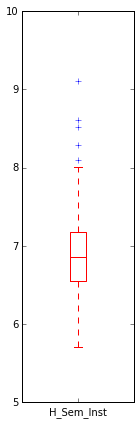

In [12]:
#Box de Salarios de Homens sem Instrucao
Instruçao_Semh.plot(kind='box', color=('red'), figsize= (2.0, 7.0), ylim = [5,10])
Instruçao_Semh.describe()

count    167.000000
mean       6.711996
std        0.334478
min        5.991465
25%        6.519147
50%        6.568078
75%        6.802395
max        8.527935
Name: F_Sem_Inst, dtype: float64

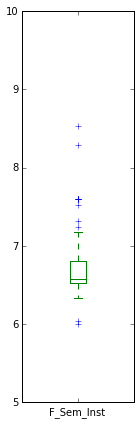

In [13]:
#Box de Salarios de Mulheres sem Instrucao
Instruçao_Semf.plot(kind='box', color=('green'), figsize= (2.0, 7.0), ylim = [5,10])
Instruçao_Semf.describe()

count    4730.000000
mean        7.020194
std         0.411519
min         5.991465
25%         6.684612
50%         6.992555
75%         7.244228
max         9.116030
Name: H_F_i, dtype: float64

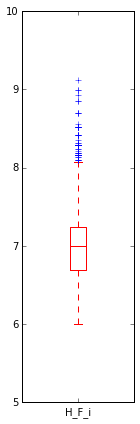

In [14]:
#Box de Salarios de Homens com Fundamental Incompleto
Instruçao_F_ih.plot(kind='box', color=('red'), figsize= (2.0, 7.0), ylim = [5,10])
Instruçao_F_ih.describe()

count    1080.000000
mean            -inf
std              NaN
min             -inf
25%         6.519147
50%         6.620073
75%         6.802395
max         8.294050
Name: F_F_i, dtype: float64

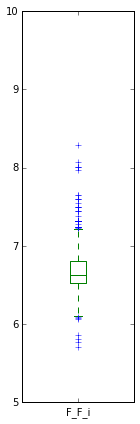

In [15]:
#Box de Salarios de Mulheres com Fundamental Incompleto
Instruçao_F_if.plot(kind='box', color=('green'), figsize= (2.0, 7.0), ylim = [5,10])
Instruçao_F_if.describe()

count    2558.000000
mean        7.119167
std         0.430892
min         6.109248
25%         6.802395
50%         7.090077
75%         7.377759
max         9.472705
Name: H_F_c, dtype: float64

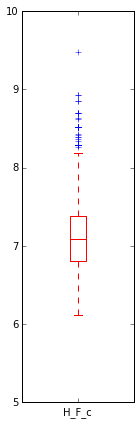

In [16]:
#Box de Salarios de Homens com Fundamental Completo
Instruçao_F_ch.plot(kind='box', color=('red'), figsize= (2.0, 7.0), ylim = [5,10])
Instruçao_F_ch.describe()

count    686.000000
mean       6.770209
std        0.304287
min        5.703782
25%        6.525380
50%        6.684612
75%        6.907755
max        8.517193
Name: F_F_c, dtype: float64

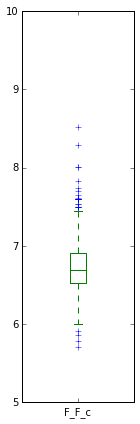

In [17]:
#Box de Salarios de Mulheres com Fundamental Completo
Instruçao_F_cf.plot(kind='box', color=('green'), figsize= (2.0, 7.0), ylim = [5,10])
Instruçao_F_cf.describe()

count    1272.000000
mean        7.075476
std         0.427499
min         6.437752
25%         6.712954
50%         7.008955
75%         7.313220
max         8.699515
Name: H_EM_i, dtype: float64

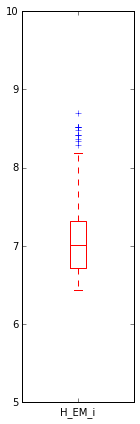

In [18]:
#Box de Salarios de Homens com Medio Incompleto
Instruçao_EM_ih.plot(kind='box', color=('red'), figsize= (2.0, 7.0), ylim = [5,10])
Instruçao_EM_ih.describe()

count    415.000000
mean       6.736107
std        0.274861
min        5.703782
25%        6.536692
50%        6.684612
75%        6.856462
max        8.699515
Name: F_EM_i, dtype: float64

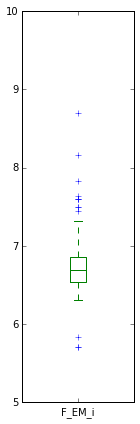

In [19]:
#Box de Salarios de Mulheres com Medio Incompleto
Instruçao_EM_if.plot(kind='box', color=('green'), figsize= (2.0, 7.0), ylim = [5,10])
Instruçao_EM_if.describe()

count    7692.000000
mean        7.267434
std         0.514235
min         5.605802
25%         6.907755
50%         7.212294
75%         7.600902
max         9.998798
Name: H_EM_c, dtype: float64

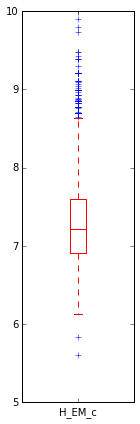

In [20]:
#Box de Salarios de Homens com Medio Completo
Instruçao_EM_ch.plot(kind='box', color=('red'), figsize= (2.0, 7.0), ylim = [5,10])
Instruçao_EM_ch.describe()

count    3230.000000
mean        6.893897
std         0.388783
min         5.703782
25%         6.584791
50%         6.802395
75%         7.090077
max         9.457200
Name: F_EM_c, dtype: float64

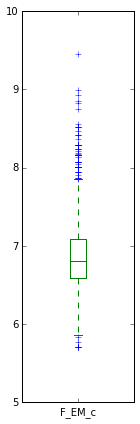

In [21]:
#Box de Salarios de Mulheres com Medio Completo
Instruçao_EM_cf.plot(kind='box', color=('green'), figsize= (2.0, 7.0), ylim = [5,10])
Instruçao_EM_cf.describe()

count    918.000000
mean       7.595954
std        0.650458
min        5.703782
25%        7.090077
50%        7.600902
75%        8.006368
max        9.903488
Name: H_Sup_i, dtype: float64

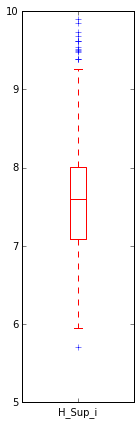

In [22]:
#Box de Salarios de Homens com Superior Incompleto
Instruçao_Sup_ih.plot(kind='box', color=('red'), figsize= (2.0, 7.0), ylim = [5,10])
Instruçao_Sup_ih.describe()

count    543.000000
mean       7.203384
std        0.538780
min        5.828946
25%        6.802395
50%        7.090077
75%        7.495542
max        9.615805
Name: F_Sup_i, dtype: float64

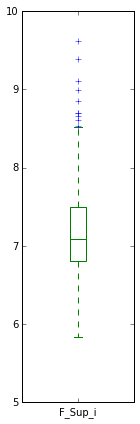

In [23]:
#Box de Salarios de Mulheres com Superior Incompleto
Instruçao_Sup_if.plot(kind='box', color=('green'), figsize= (2.0, 7.0), ylim = [5,10])
Instruçao_Sup_if.describe()

count    2199.000000
mean        8.212849
std         0.776973
min         6.519147
25%         7.600902
50%         8.160518
75%         8.748305
max        10.819778
Name: H_Sup_c, dtype: float64

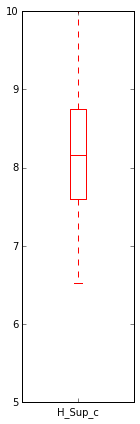

In [24]:
#Box de Salarios de Homens com Superior Completo
Instruçao_Sup_ch.plot(kind='box', color=('red'), figsize= (2.0, 7.0), ylim = [5,10])
Instruçao_Sup_ch.describe()

count    1232.000000
mean        7.729187
std         0.733841
min         5.826000
25%         7.170120
50%         7.603396
75%         8.268732
max        10.596635
Name: F_Sup_c, dtype: float64

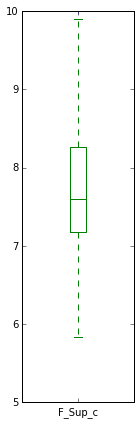

In [25]:
#Box de Salarios de Mulheres com Superior Completo
Instruçao_Sup_cf.plot(kind='box', color=('green'), figsize= (2.0, 7.0), ylim = [5,10])
Instruçao_Sup_cf.describe()

#COMPARANDO SALARIOS DE HOMENS E MULHERES COM O MESMO ANOS DE TRABALHO

count    16377.000000
mean         7.213345
std          0.581417
min          5.605802
25%          6.802395
50%          7.090077
75%          7.495542
max         10.819778
Name: H_zero_a_dez, dtype: float64

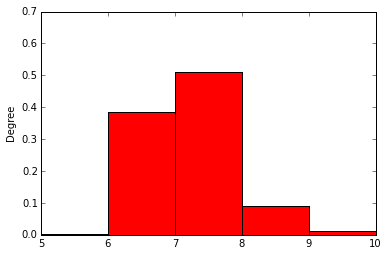

In [26]:
#Histograma de Salario de Homens que trabalham de 0 a 10 anos
faixas = (5,6,7,8,9,10)
pd.DataFrame.plot(kind='hist', data=Anos_zero_a_dezh, bins=faixas, color=('red'), normed=True, legend=False, ylim = [0,0.7])
Anos_zero_a_dezh.describe()

count    6346.000000
mean            -inf
std              NaN
min             -inf
25%         6.564208
50%         6.802395
75%         7.090077
max         9.903488
Name: M_zero_a_dez, dtype: float64

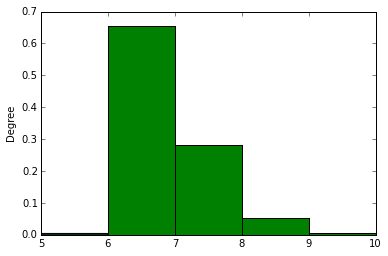

In [27]:
#Histograma de Salario de Mulheres que trabalham de 0 a 10 anos
pd.DataFrame.plot(kind='hist', data=Anos_zero_a_dezm, bins=faixas, color=('green'), normed=True, legend=False, ylim = [0,0.7])
Anos_zero_a_dezm.describe()

count    2722.000000
mean        7.464431
std         0.660817
min         6.396930
25%         7.003065
50%         7.313220
75%         7.824046
max        10.308953
Name: H_onze_a_vinte, dtype: float64

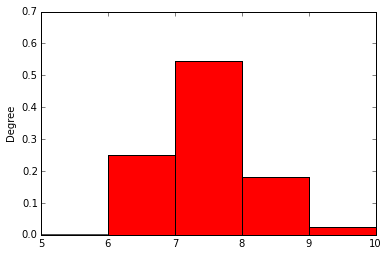

In [28]:
#Histograma de Salario de Homens que trabalham de 11 a 20 anos
pd.DataFrame.plot(kind='hist', data=Anos_onze_a_vinteh, bins=faixas, color=('red'), normed=True, legend=False, ylim = [0,0.7])
Anos_onze_a_vinteh.describe()

count    712.000000
mean       7.264554
std        0.697616
min        5.826000
25%        6.684612
50%        7.090077
75%        7.617760
max       10.596635
Name: M_onze_a_vinte, dtype: float64

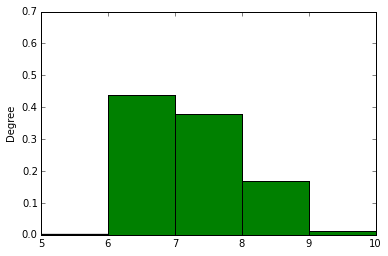

In [29]:
#Histograma de Salario de Mulheres que trabalham de 11 a 20 anos
pd.DataFrame.plot(kind='hist', data=Anos_onze_a_vintem, bins=faixas, color=('green'), normed=True, legend=False, ylim = [0,0.7])
Anos_onze_a_vintem.describe()

count    946.000000
mean       7.758394
std        0.778225
min        6.519147
25%        7.170120
50%        7.600902
75%        8.181646
max       10.596635
Name: H_vinteum_a_trinta, dtype: float64

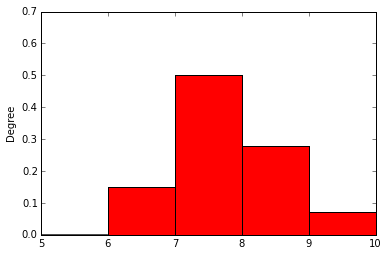

In [30]:
#Histograma de Salario de Homens que trabalham de 21 a 30 anos
pd.DataFrame.plot(kind='hist', data=Anos_vinteum_a_trintah, bins=faixas, color=('red'), normed=True, legend=False, ylim = [0,0.7])
Anos_vinteum_a_trintah.describe()

count    258.000000
mean       7.409346
std        0.762875
min        5.768321
25%        6.802395
50%        7.244228
75%        7.919807
max        9.615805
Name: M_vinteum_a_trinta, dtype: float64

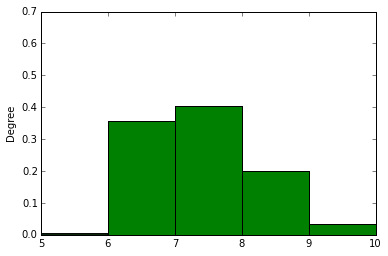

In [31]:
#Histograma de Salario de Mulheres que trabalham de 21 a 30 anos
pd.DataFrame.plot(kind='hist', data=Anos_vinteum_a_trintam, bins=faixas, color=('green'), normed=True, legend=False, ylim = [0,0.7])
Anos_vinteum_a_trintam.describe()

count    231.000000
mean       7.880510
std        0.850793
min        6.519147
25%        7.244228
50%        7.749322
75%        8.517193
max       10.645425
Name: H_trintaum_a_quarenta, dtype: float64

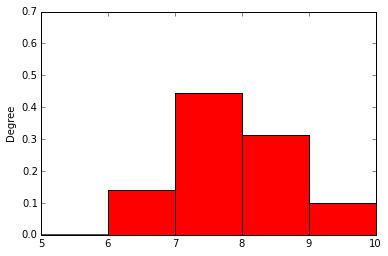

In [32]:
#Histograma de Salarios de Homens que trabalham de 31 a 40 anos
pd.DataFrame.plot(kind='hist', data=Anos_trintaum_a_quarentah, bins=faixas, color=('red'), normed=True, legend=False, ylim = [0,0.7])
Anos_trintaum_a_quarentah.describe()

count    61.000000
mean      7.843638
std       0.845880
min       6.519147
25%       7.212294
50%       7.824046
75%       8.294050
max       9.998798
Name: M_trintaum_a_quarenta, dtype: float64

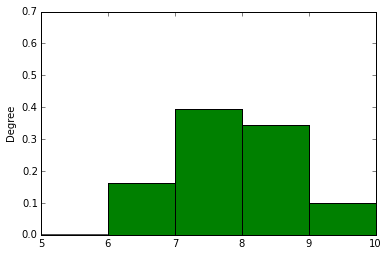

In [33]:
#Histograma de Salarios de Mulheres que trabalham de 31 a 40 anos
pd.DataFrame.plot(kind='hist', data=Anos_trintaum_a_quarentam, bins=faixas, color=('green'), normed=True, legend=False, ylim = [0,0.7])
Anos_trintaum_a_quarentam.describe()

count    16.000000
mean      7.946893
std       0.920055
min       6.802395
25%       7.432713
50%       7.648558
75%       8.006368
max       9.740969
Name: H_quarentaum_a_cinquenta, dtype: float64

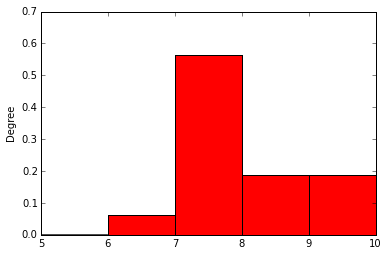

In [34]:
#Histograma de Salarios de Homens que trabalham de 41 a 50 anos
pd.DataFrame.plot(kind='hist', data=Anos_quarentaum_a_cinquentah, bins=faixas, color=('red'), normed=True, legend=False, ylim = [0,0.7])
Anos_quarentaum_a_cinquentah.describe()

count    5.000000
mean     7.655493
std      1.297331
min      6.519147
25%      6.678342
50%      7.170120
75%      8.294050
max      9.615805
Name: M_quarentaum_a_cinquenta, dtype: float64

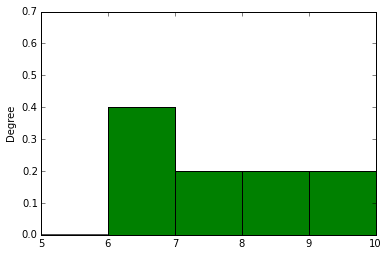

In [35]:
#Histograma de Salarios de Mulheres que trabalham de 41 a 50 anos
pd.DataFrame.plot(kind='hist', data=Anos_quarentaum_a_cinquentam, bins=faixas, color=('green'), normed=True, legend=False, ylim = [0,0.7])
Anos_quarentaum_a_cinquentam.describe()

count    6.000000
mean     7.991388
std      1.345634
min      6.519147
25%      6.930101
50%      7.803635
75%      8.910535
max      9.903488
Name: H_cinquentaum_a_sessenta, dtype: float64

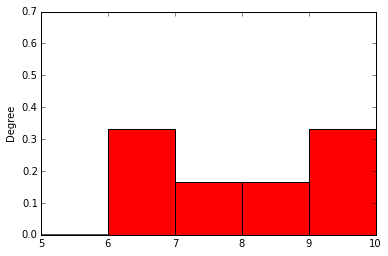

In [36]:
#Histograma de Salarios de Homens que trabalham de 51 a 60 anos
pd.DataFrame.plot(kind='hist', data=Anos_cinquentaum_a_sessentah, bins=faixas, color=('red'), normed=True, legend=False, ylim = [0,0.7])
Anos_cinquentaum_a_sessentah.describe()

count    1.000000
mean     8.006368
std           NaN
min      8.006368
25%      8.006368
50%      8.006368
75%      8.006368
max      8.006368
Name: M_cinquentaum_a_sessenta, dtype: float64

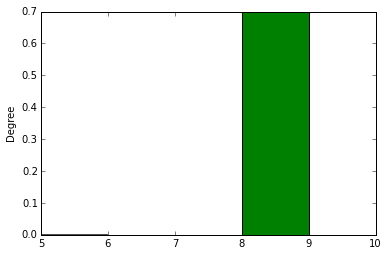

In [37]:
#Histograma de Salarios de Mulheres que trabalham de 51 a 60 anos
pd.DataFrame.plot(kind='hist', data=Anos_cinquentaum_a_sessentam, bins=faixas, color=('green'), normed=True, legend=False, ylim = [0,0.7])
Anos_cinquentaum_a_sessentam.describe()

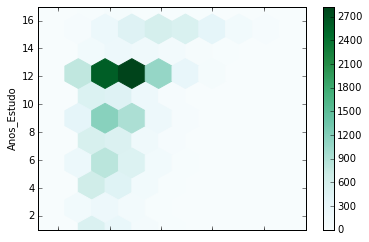

In [38]:
#Grafico de concentracao de Anos de Estudo X Renda para Homens
table01.plot(kind='hexbin',x = 'Rendimento',y='Anos_Estudo', gridsize = 10)

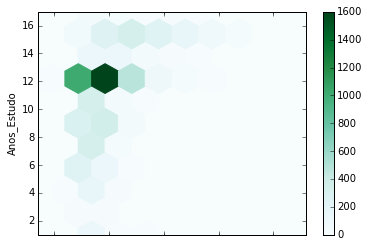

In [39]:
#Grafico de Concentracao de Anos de Estudo X Renda para Mulheres
table02.plot('Rendimento','Anos_Estudo', kind='hexbin', gridsize = 10)

6.55272375536
0.0719338893151


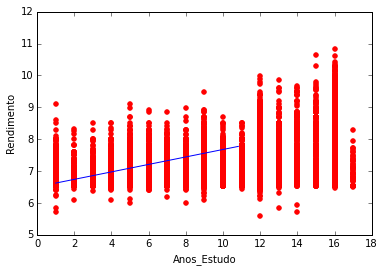

In [40]:
#Grafico de Dispersao de Horas/Semana X Renda para Homens - Com linha de tendencia
scatter_and_line(table01 ,"Anos_Estudo","Rendimento")
#funcao da reta = 0.07213001204418*x+6.55229920216

nan
nan


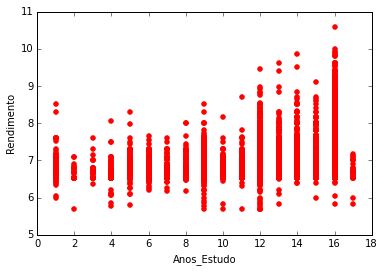

In [41]:
#Grafico de Dispersao de Horas/Semana X Renda para Mulheres - Com Linha de tendencia
scatter_and_line(table02, "Anos_Estudo", "Rendimento")
#funcao da reta = 0.0792325824519*x+6.10554278908